In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = r"C:\Users\PRAJAKTA\Downloads\Mall_Customers.csv"

In [4]:
mall = pd.read_csv(path)

In [5]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
mall.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
mall.shape

(200, 5)

In [8]:
mall.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
mall.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'},inplace= True)

In [12]:
mall.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [37]:
x = mall[['Annual_Income', 'Spending_Score']]

In [38]:
x.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

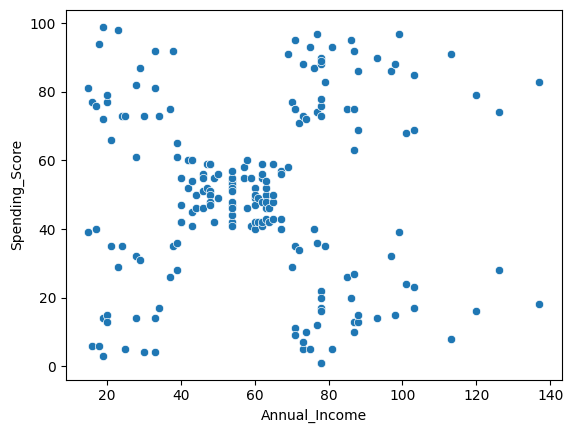

In [39]:
sns.scatterplot(data = x , x = 'Annual_Income', y = 'Spending_Score')

In [40]:
mall.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [41]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Annual_Income   200 non-null    int64
 1   Spending_Score  200 non-null    int64
dtypes: int64(2)
memory usage: 4.7 KB


In [42]:
x.isnull().sum()

Annual_Income     0
Spending_Score    0
dtype: int64

In [43]:
x.duplicated().sum()

np.int64(4)

In [47]:
x.drop_duplicates(inplace= True, ignore_index = True)

In [48]:
x.duplicated().sum()

np.int64(0)

In [49]:
x.reset_index(inplace= True)

In [50]:
x

,level_0,index,Annual_Income,Spending_Score
0,0,0,15,39
1,1,1,15,81
2,2,2,16,6
3,3,3,16,77
4,4,4,17,40
...,...,...,...,...
191,191,191,120,79
192,192,192,126,28
193,193,193,126,74
194,194,194,137,18


In [54]:
x.drop(['level_0' , 'index'] , axis = 1 , inplace=True)

In [55]:
x

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
191,120,79
192,126,28
193,126,74
194,137,18


In [25]:
from sklearn.preprocessing import StandardScaler

In [56]:
st = StandardScaler()

In [57]:
x_scaled = st.fit_transform(x)

In [58]:
x_scaled

array([[-1.72880035, -0.44041245],
       [-1.72880035,  1.1934205 ],
       [-1.69087703, -1.72413834],
       [-1.69087703,  1.03781736],
       [-1.65295371, -0.40151167],
       [-1.65295371,  0.99891658],
       [-1.61503039, -1.72413834],
       [-1.61503039,  1.6991307 ],
       [-1.57710707, -1.8408407 ],
       [-1.57710707,  0.84331344],
       [-1.57710707, -1.41293207],
       [-1.57710707,  1.89363462],
       [-1.53918375, -1.37403128],
       [-1.53918375,  1.03781736],
       [-1.53918375, -1.45183285],
       [-1.53918375,  1.11561893],
       [-1.50126043, -0.59601559],
       [-1.50126043,  0.60990873],
       [-1.42541378, -0.8294203 ],
       [-1.42541378,  1.85473384],
       [-1.38749046, -0.59601559],
       [-1.38749046,  0.88221422],
       [-1.34956714, -1.76303913],
       [-1.34956714,  0.88221422],
       [-1.23579718, -1.41293207],
       [-1.23579718,  1.23232128],
       [-1.23579718, -0.71271795],
       [-1.23579718,  0.41540481],
       [-1.19787386,

In [62]:
x.columns

Index(['Annual_Income', 'Spending_Score'], dtype='object')

In [64]:
x_scaled = pd.DataFrame(x_scaled , columns = ['Annual_Income', 'Spending_Score'])
x_scaled

,Annual_Income,Spending_Score
0,-1.728800,-0.440412
1,-1.728800,1.193420
2,-1.690877,-1.724138
3,-1.690877,1.037817
4,-1.652954,-0.401512
...,...,...
191,2.253148,1.115619
192,2.480688,-0.868321
193,2.480688,0.921115
194,2.897845,-1.257329


In [59]:
from sklearn.cluster import KMeans

In [81]:
kmean = KMeans(n_clusters=2)

In [82]:
kmean.fit(x_scaled)

KMeans(n_clusters=2)

In [83]:
kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0],
      dtype=int32)

In [84]:
kmean.inertia_

269.0772519809724

In [85]:
lb = kmean.labels_

In [86]:
lb

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0],
      dtype=int32)

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

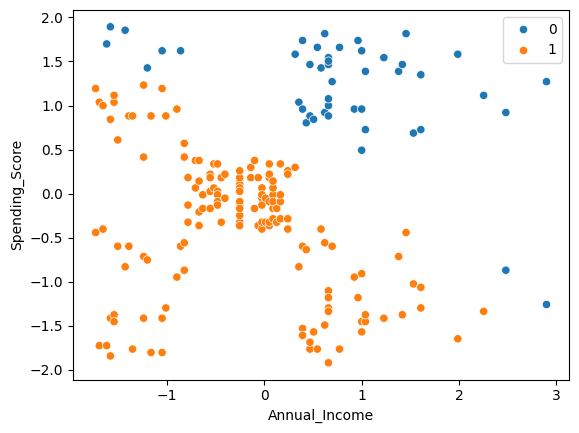

In [87]:
sns.scatterplot(data = x_scaled , x = 'Annual_Income', y = 'Spending_Score', 
                hue=lb)

In [88]:
# to estimate value of k --> plot elbow plot

In [92]:
inertia = []
for k in range(2, 10):
    kmean = KMeans(n_clusters= k)
    kmean.fit(x_scaled)
    inertia.append(kmean.inertia_)

In [93]:
inertia

[263.7342284430005,
 155.77834662639106,
 106.85655819766502,
 63.51599970163507,
 53.39399810932827,
 48.47283893897629,
 36.46381313333869,
 32.78175044240484]

<Axes: >

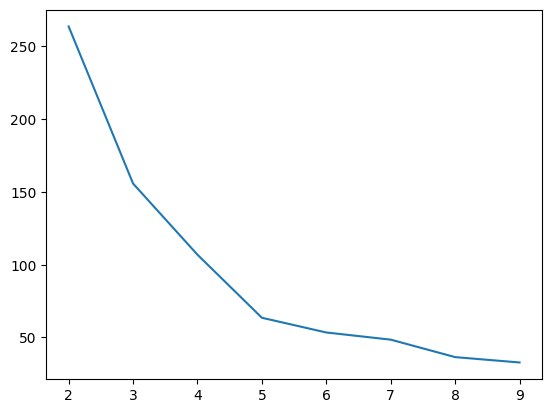

In [94]:
sns.lineplot(x = range(2, 10), y = inertia)

In [95]:
kmean5 = KMeans(n_clusters= 5)

In [97]:
kmean5.fit(x_scaled)

KMeans(n_clusters=5)

In [99]:
lb5 = kmean5.labels_

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

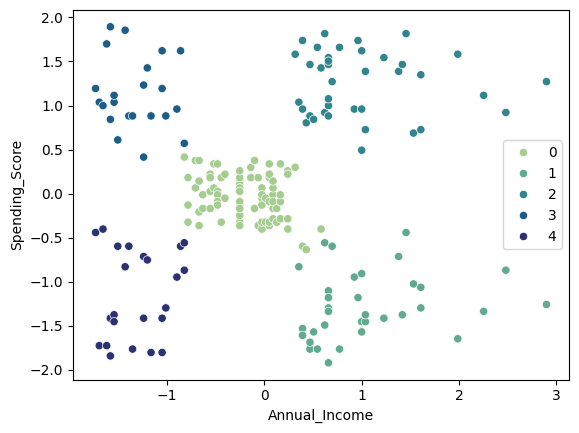

In [110]:
sns.scatterplot(data = x_scaled , x = 'Annual_Income', y = 'Spending_Score', 
                hue=lb5, palette= 'crest')

In [103]:
# silhoute score
from sklearn.metrics import silhouette_score

In [104]:
silhouette_score(X= x_scaled, labels= lb5)

np.float64(0.5574866183614334)